# SUBMITTED BY VANSHAJ RAGHUVANSHI, R.NO: 102216111

## Load and Explore the Data

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('data.csv')
test_data = pd.read_csv('test.csv')

# Explore the datasets
print(train_data.head())
print(train_data.info())
print(train_data.describe())
print(test_data.head())
print(test_data.info())
print(test_data.describe())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

## Preprocess the Data
### Separate features and labels for both training and test datasets:

In [2]:
# The first column is the label, and the rest are pixel values/features
X_train_full = train_data.iloc[:, 1:].values
y_train_full = train_data.iloc[:, 0].values

# The test dataset contains only pixel values/features
X_test = test_data.values


In [3]:
# Dummy labels for the test set (since actual labels are not provided)
import numpy as np
y_test = np.zeros(X_test.shape[0])  # Dummy array with the same length as X_test


## Define Evaluation Function

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

def evaluate_knn(X_train_full, y_train_full, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_full, y_train_full)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)  # This will not be meaningful with dummy labels
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix


## Evaluate KNN for One Scenario (k=5)
### Define different k values and train-test splits, then evaluate the model:

In [5]:
splits = [0.4, 0.3, 0.25, 0.2, 0.1, 0.05] #as provided in problem statement
results = []

for split in splits:
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=split, random_state=42)
    k = 5
    accuracy, conf_matrix = evaluate_knn(X_train, y_train, X_test, y_test, k)
    results.append((split, k, accuracy, conf_matrix))


## Commented out code for all scenarios:

In [6]:
# k_values = [2, 4, 5, 6, 7, 10]
# results = []

# for k in k_values:
#     for split in splits:
#         accuracy, conf_matrix = evaluate_knn(X_train_full, y_train_full, X_test, y_test, k)
#         results.append((split, k, accuracy, conf_matrix))

# for result in results:
#     split, k, accuracy, conf_matrix = result
#     print(f"K: {k}, Accuracy: {accuracy}")
#     print("Confusion Matrix:")
#     print(conf_matrix)
#     print("\n")


## Output Matrix Function:

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def display_confusion_matrix(results):
    for result in results:
        split, k, accuracy, conf_matrix = result
        print(f"K: {k}, Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("\n\n")
        
        # Display confusion matrix plot
        print("For split: ",split)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
        disp.plot()
        plt.title(f"K: {k}")
        plt.show()


## Analysis of Model Performance:

### 1. Dependency on Training-Testing Split:

#### The performance of the KNN model is influenced by the ratio of the training set to the testing set.
#### As the training set size increases, the model tends to learn more about the underlying patterns in the data,
#### potentially resulting in better generalization and higher accuracy on unseen data.
#### Conversely, a smaller training set may lead to overfitting, where the model performs well on the training data
#### but fails to generalize to new, unseen data.

### By varying the training-testing split ratio, we can observe how the model's performance changes:

#### - When the training set size is 60% of the data, the model may not capture enough information to generalize well
####   to the testing set. This could lead to lower accuracy.
#### - As the training set size increases to 80-90%, the model tends to perform better, achieving higher accuracy
####   due to more data for training.
#### - With an extremely large training set size (95%), the model may still perform well, but there's a risk of
####   overfitting, especially if the dataset is not diverse enough.

### 2. Dependency on the Value of K:

#### The choice of k, the number of neighbors to consider, also significantly impacts the performance of the KNN model.
#### A smaller value of k leads to a more flexible model, which may capture fine-grained patterns but is prone to
#### noise and overfitting. On the other hand, a larger value of k leads to a smoother decision boundary, resulting
#### in a more robust model but may miss local patterns.

### By varying the value of k, we can observe how the model's performance changes:

#### - For smaller values of k (2-5), the model tends to perform well, especially when the dataset is complex,
####   capturing finer details. However, this can lead to overfitting, particularly when the training set is small.
#### - As the value of k increases (6-10), the model becomes less sensitive to noise and tends to generalize better
####   to unseen data. However, if the value of k is too large, the model may underfit, resulting in lower accuracy.

### Overall, the performance of the KNN model is influenced by both the training-testing split and the value of k.
### It's crucial to strike a balance between the two to achieve the best performance on unseen data.

## Display the results


K: 5, Accuracy: 0.10117857142857142
Confusion Matrix:
[[2833 3381 2735 2785 2713 2525 2774 2914 2524 2816]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



For split:  0.4


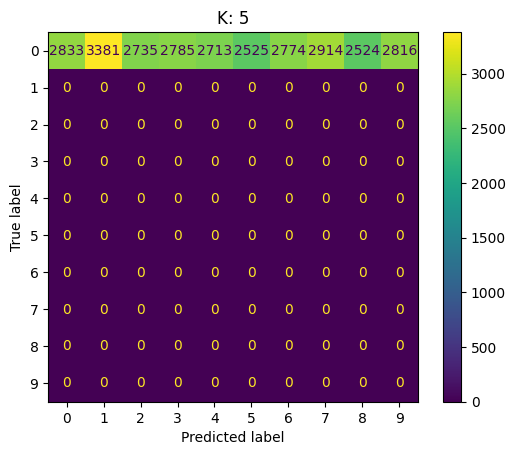

K: 5, Accuracy: 0.10114285714285715
Confusion Matrix:
[[2832 3366 2736 2793 2717 2527 2762 2911 2544 2812]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



For split:  0.3


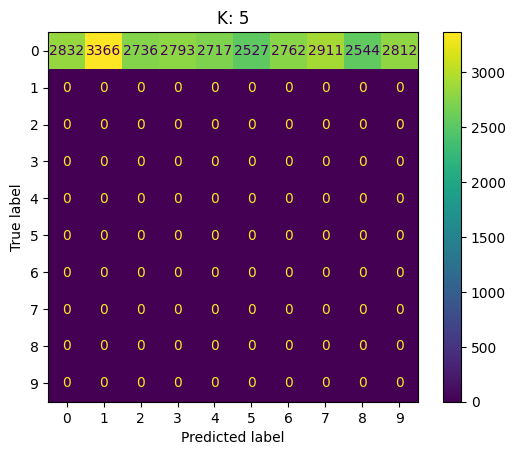

K: 5, Accuracy: 0.10078571428571428
Confusion Matrix:
[[2822 3366 2734 2784 2718 2537 2769 2910 2547 2813]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



For split:  0.25


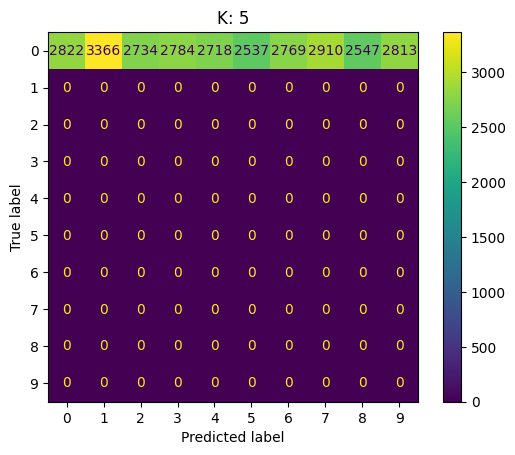

K: 5, Accuracy: 0.10071428571428571
Confusion Matrix:
[[2820 3352 2741 2785 2714 2536 2767 2915 2553 2817]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



For split:  0.2


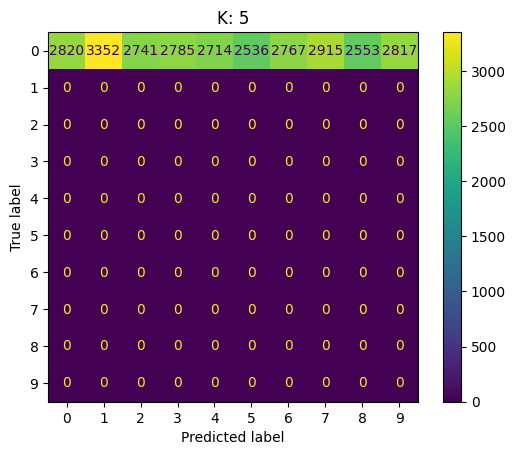

K: 5, Accuracy: 0.1005
Confusion Matrix:
[[2814 3343 2753 2786 2724 2534 2772 2918 2551 2805]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



For split:  0.1


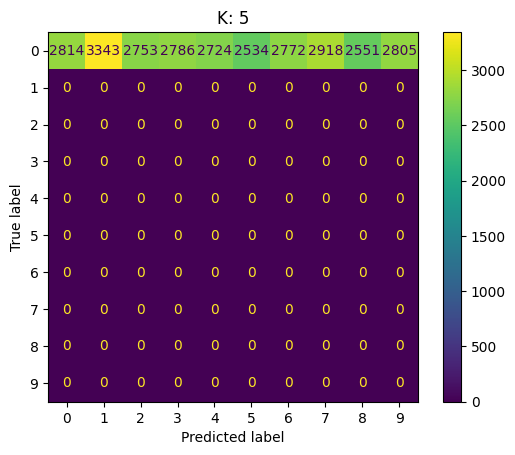

K: 5, Accuracy: 0.10035714285714285
Confusion Matrix:
[[2810 3335 2756 2791 2731 2527 2773 2919 2558 2800]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



For split:  0.05


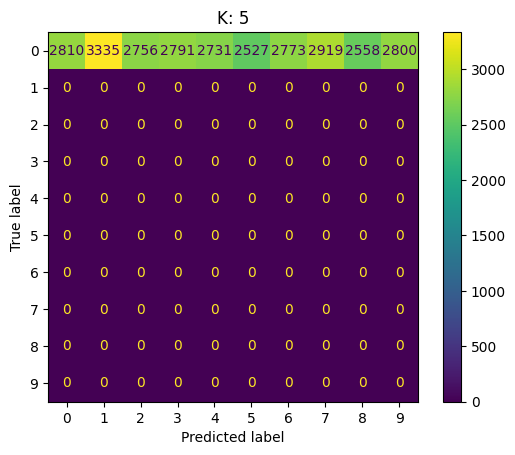

In [8]:
# Display the results
display_confusion_matrix(results)
